In [ ]:
#importing neccessary libraries

In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
#Load the data

In [295]:
df = pd.read_csv("german_credit_data.csv")
#df.shape
df.info()
#df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1000 non-null   int64
 1   Sex               1000 non-null   int64
 2   Job               1000 non-null   int64
 3   Housing           1000 non-null   int64
 4   Saving_accounts   1000 non-null   int64
 5   Checking_account  1000 non-null   int64
 6   Credit_amount     1000 non-null   int64
 7   Duration          1000 non-null   int64
 8   Purpose           1000 non-null   int64
 9   Risk              1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


In [296]:
df.head

<bound method NDFrame.head of      Age  Sex  Job  Housing  Saving_accounts  Checking_account  Credit_amount  \
0     67    0    2        1                1                 0           1169   
1     22    1    2        1                0                 3           5951   
2     49    0    1        1                0                 1           2096   
3     45    0    2        0                0                 0           7882   
4     53    0    2        0                0                 0           4870   
..   ...  ...  ...      ...              ...               ...            ...   
995   31    1    1        1                0                 1           1736   
996   40    0    3        1                0                 0           3857   
997   38    0    2        1                0                 1            804   
998   23    0    2        0                0                 0           1845   
999   27    0    2        1                3                 3           4576  

In [297]:
df.shape

(1000, 10)

In [ ]:
#Correlation for determining the linear relationship

<AxesSubplot:>

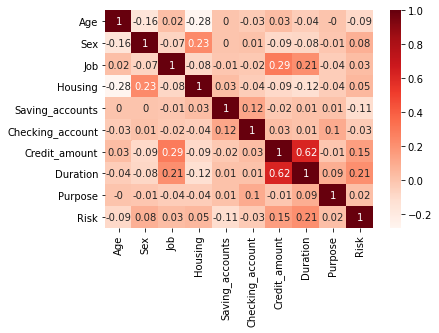

In [298]:
corr = df.corr().round(2)
sns.heatmap(data=corr,  annot=True, cmap="Reds",)

In [ ]:
#EDA on purpose feature

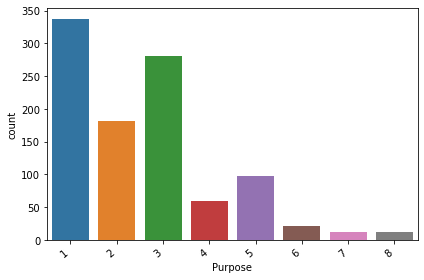

In [299]:
ax = sns.countplot(x="Purpose", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
#Visualizing the linear relationship using seaborn

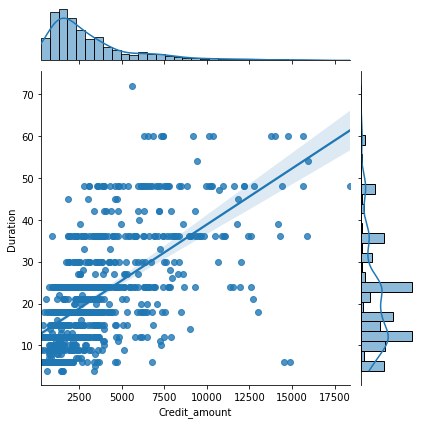

In [300]:
sns.jointplot(x="Credit_amount", y="Duration", kind="reg", data=df)
#sns.relplot(x="Credit_amount", y="Duration", hue="Risk", kind="scatter", data=df)

In [ ]:
#EDA on Job feature

<AxesSubplot:xlabel='Job', ylabel='count'>

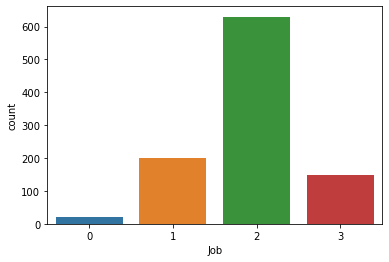

In [301]:
sns.countplot(df.Job)

In [ ]:
#EDA on SEX feature distribution

<AxesSubplot:xlabel='Sex', ylabel='Density'>

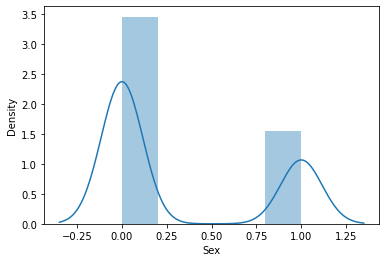

In [302]:
sns.distplot(df.Sex)

In [ ]:
#EDA on House feature

<AxesSubplot:xlabel='Housing', ylabel='count'>

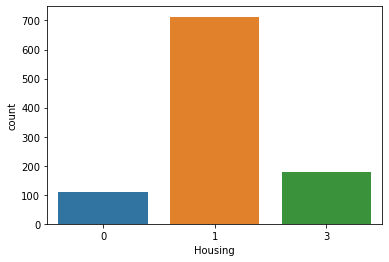

In [303]:
sns.countplot(df.Housing)

In [ ]:
#EDA on savings account of people

<AxesSubplot:xlabel='Saving_accounts', ylabel='count'>

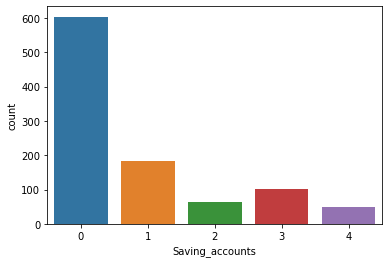

In [304]:
sns.countplot(df.Saving_accounts)

In [ ]:
#EDA on checking account of people

<AxesSubplot:xlabel='Checking_account', ylabel='count'>

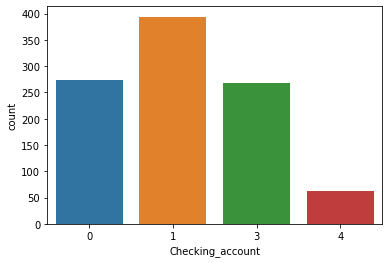

In [305]:
sns.countplot(df.Checking_account)

In [306]:
df1 = pd.read_csv("Credit_data (1).csv")
df1.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk
0,0,67,male,2,own,Zero,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,Zero,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


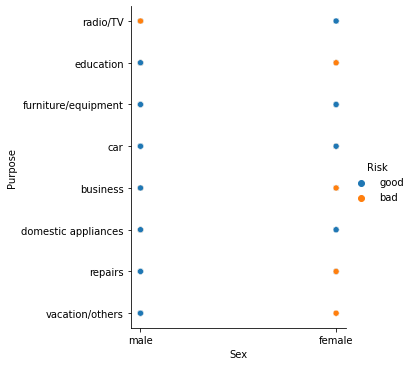

In [307]:
sns.relplot(x="Sex", y="Purpose", hue="Risk", data = df1)

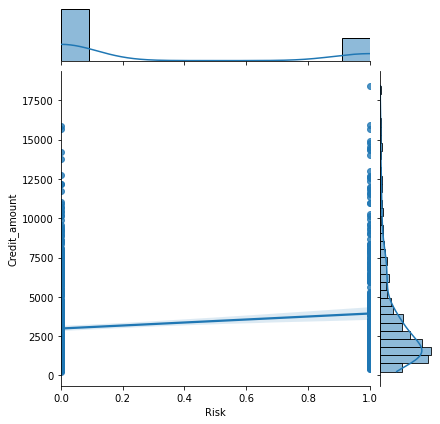

In [308]:
sns.jointplot(x="Risk", y="Credit_amount", data=df, kind="reg")

In [ ]:
#Train and test size split

In [309]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = df["Risk"]
X = df.drop(["Risk"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, shuffle=True, random_state=42)

In [ ]:
#Importing library of models for classification

In [310]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Model pipeline creation

In [311]:
model_pipeline = []
model_pipeline.append (LogisticRegression(solver="liblinear"))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())

In [ ]:
#Importing score metrics

In [312]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model_list = ["Logistic Regression", "SVM", "KNN", "Decision Tree", "Random Forest", "Naive Bayes"]
acc_list = []
auc_list = []
cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    auc_list.append(round(metrics.auc(fpr,tpr),2))
    cm_list.append(confusion_matrix(y_test, y_pred))

In [ ]:
#plotting confusion matrix for the models

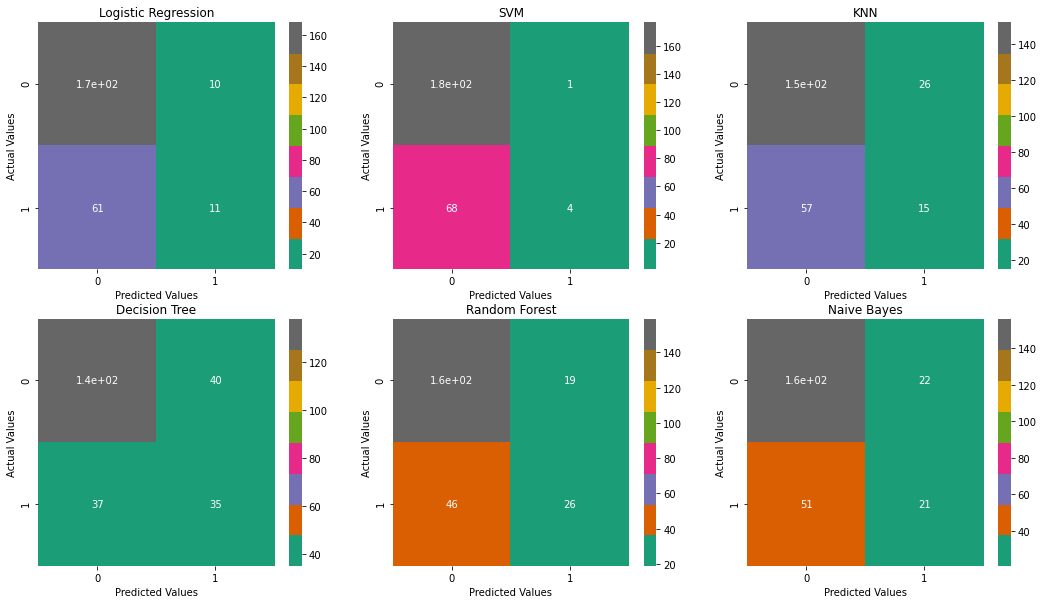

In [313]:
## confusion matrix

fig = plt.figure(figsize = (18,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap= "Dark2")
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

In [ ]:
#plotting model name, accuracy and AUC score

In [315]:
## accuracy and AUC

Result_df = pd.DataFrame({"Model": model_list, "Accuracy": acc_list, "AUC": auc_list} )
Result_df

,Model,Accuracy,AUC
0,Logistic Regression,0.716,0.55
1,SVM,0.724,0.52
2,KNN,0.668,0.53
3,Decision Tree,0.692,0.63
4,Random Forest,0.740,0.63
5,Naive Bayes,0.708,0.58


In [265]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

In [ ]:
#Score on test and train

In [268]:
print("score on test: "  + str(clf.score(X_test, y_test)))
print("score on train: " + str(clf.score(X_train, y_train)))

score on test: 0.668
score on train: 1.0


In [269]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [277]:
precision = accuracy_score(y_test, predict)
Recall = accuracy_score(y_test, predict)
print(f'Precision: {precision}')
print(f'Recall: {Recall}' )

Precision: 0.668
Recall: 0.668


In [271]:
matrix = confusion_matrix(y_test, predict)
print(f'Matrix:\n {matrix}')

Matrix:
 [[135  41]
 [ 42  32]]


In [ ]:
#importing cross validation

In [272]:
from sklearn.model_selection import cross_val_score

In [273]:
result = cross_val_score(clf, X, y, cv = 10)

In [ ]:
#printing cross validation mean and standard deviation

In [274]:
print(f' Cross Validation Mean: {result.mean()}')
print(f' Cross Validation Std: {result.std()}')

 Cross Validation Mean: 0.662
 Cross Validation Std: 0.05114684741017769


In [ ]:
#plotting the number of good and bad risk count

<AxesSubplot:xlabel='Risk', ylabel='count'>

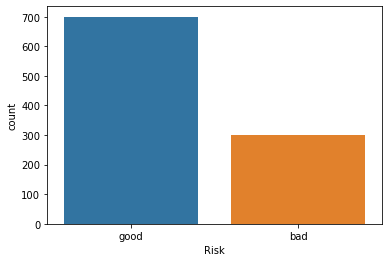

In [278]:
sns.countplot(df1.Risk)

In [281]:
from sklearn.linear_model import LogisticRegression

LogisticRegression(random_state=0)